In [145]:
from model.poisson_vhmm import PoissonVHMM
import jax
from numpy.random import gamma, poisson
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
### generate test data

cluster_num = 2
batch = 100
time = 100

pi_dirichlet = 5. * np.ones(cluster_num)
A_dirichlet = 10. * np.eye(cluster_num) + 1.0 * np.ones((cluster_num, cluster_num))

pi = np.random.dirichlet(pi_dirichlet)
A = np.array([np.random.dirichlet(A_dirichlet[i]) for i in range(cluster_num)])

lam_gamma_a = 3.
lam_gamma_b = 0.01

lam = np.random.gamma(lam_gamma_a, 1/lam_gamma_b, size=cluster_num)

state = np.zeros((time, batch), dtype=np.int16)
for i in range(time):
    if i == 0:
        state[0] = np.random.multinomial(n=1, pvals=pi, size=state[0].shape).argmax(-1)
    else:
        for b in range(batch):
            state[i][b] = np.random.multinomial(n=1, pvals=A[state[i-1][b]], size=1).argmax(-1)

obs = np.zeros((time, batch))
for i in range(time):
    for b in range(batch):
        obs[i][b] = np.random.poisson(lam[state[i][b]])


In [153]:
print(A)
print(pi)

[[0.88633306 0.11366694]
 [0.24230122 0.75769878]]
[0.45781128 0.54218872]


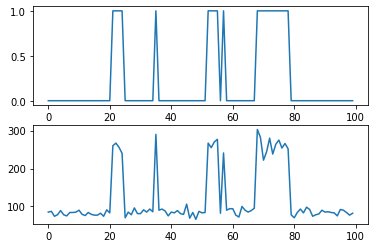

In [154]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(state[:, 0])
plt.subplot(2, 1, 2)
plt.plot(obs[:, 0])


-208333.45
-98723.7
-39286.938
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-39287.875
-

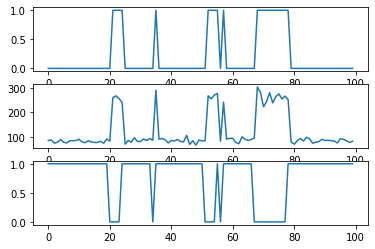

In [155]:
import jax.numpy as jnp
cluster_num = 2
model = PoissonVHMM(cluster_num,
                    init_state_prior=jnp.array([10., 10.]),
                    transition_prior=100.*jnp.eye(cluster_num) +  1.0 * jnp.ones((cluster_num, cluster_num)),
                    poisson_prior=np.array([3., 0.01]))

gamma, viterbi, elbo = model.fit(jnp.array(obs))

plt.subplot(3, 1, 1)
plt.plot(state[:, 0])
plt.subplot(3, 1, 2)
plt.plot(obs[:, 0])
plt.subplot(3, 1, 3)
plt.plot(viterbi[:, 0])

[3.2384496 3.715849  3.9169936]
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.36
-40998.3

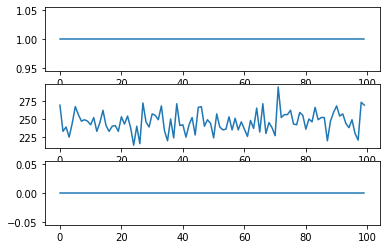

In [150]:
import jax.numpy as jnp
cluster_num = 3
model = PoissonVHMM(cluster_num,
                    init_state_prior=10.*jnp.ones(cluster_num),
                    transition_prior=100.*jnp.eye(cluster_num) +  1.0 * np.ones((cluster_num, cluster_num)),
                    poisson_prior=jnp.array([3., 0.01]))
print(model.poisson_posterior_a)
gamma, viterbi, elbo = model.fit(jnp.array(obs))

plt.subplot(3, 1, 1)
plt.plot(state[:, 0])
plt.subplot(3, 1, 2)
plt.plot(obs[:, 0])
plt.subplot(3, 1, 3)
plt.plot(viterbi[:, 0])


In [151]:
print(obs.shape)

(100, 100)
